In [63]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [64]:
df = pd.read_csv('avocado.csv.zip')

In [65]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [66]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [67]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [68]:
# Deleting the Unnamed column which do not have any info
df.drop("Unnamed: 0", axis=1, inplace=True)

In [69]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [70]:
#Checking out the number of rows and column
df.shape

(18249, 13)

In [71]:
#Checking for the basic info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [72]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [73]:
# Checking that the dataset has null or NaN
df.isnull

<bound method DataFrame.isnull of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags

In [74]:
#Verifying is there any missing null values
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

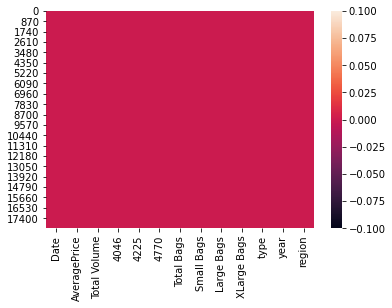

In [75]:
#Representing the Null Values
import seaborn as sb
sb.heatmap(df.isnull())

In [76]:
#Analyzing the Dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Here we found that we have null values in column 4046,4225,4770 ,Total bags,Small bags,large bas ,XLarge bags

In [77]:
#Checking for the correlation between different rows and columns
dfcorrelation = df.corr()
dfcorrelation

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


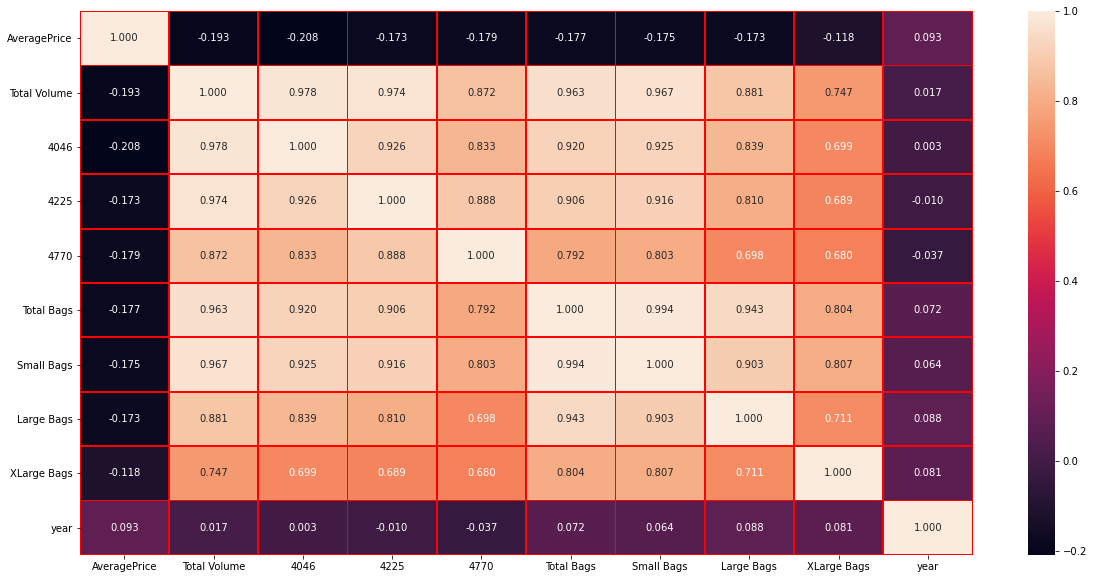

In [78]:
#Heatmap presenting the Correlation 
correlation=df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(correlation,annot=True,linewidths=0.75,linecolor="red",fmt=".3f")
plt.show()

In [79]:
#Checking the Uniqueness of the columns
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

# Visualisation of the data

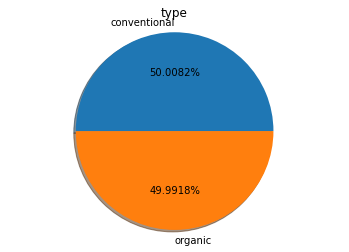

In [80]:
#Conventional vs organic
df['type'].value_counts()
plt.pie(a,labels=a.index, shadow=True, autopct="%0.4f%%")
plt.title("type")
plt.axis("equal")
plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

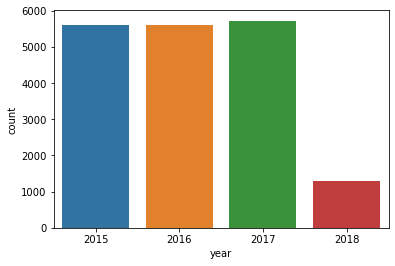

In [81]:
#Yearwise sales of Avacado 
sns.countplot(x='year', data=df)

Total number of Regions are =  54


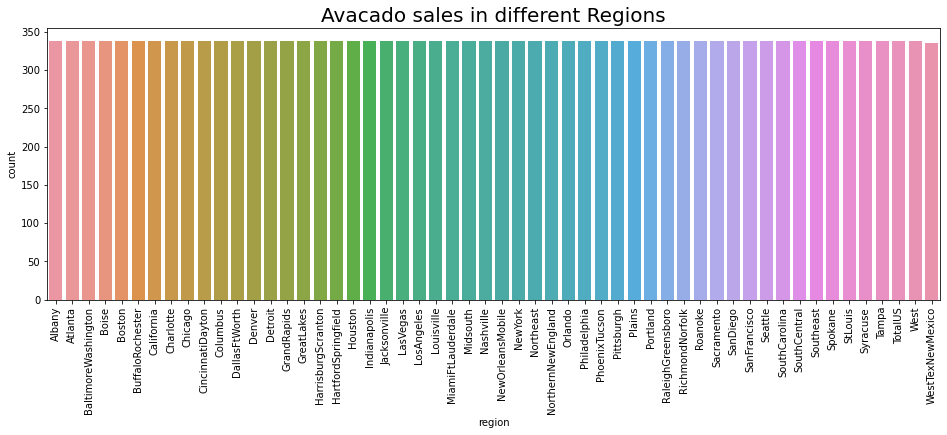

In [82]:
#Avacado sales in different regions
import matplotlib.pyplot as plt
print("Total number of Regions are = ",len(df['region'].unique()))
plt.figure(figsize = (16,5))
ax = sns.countplot(x="region", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Avacado sales in different Regions", fontsize = 20)
plt.show()

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

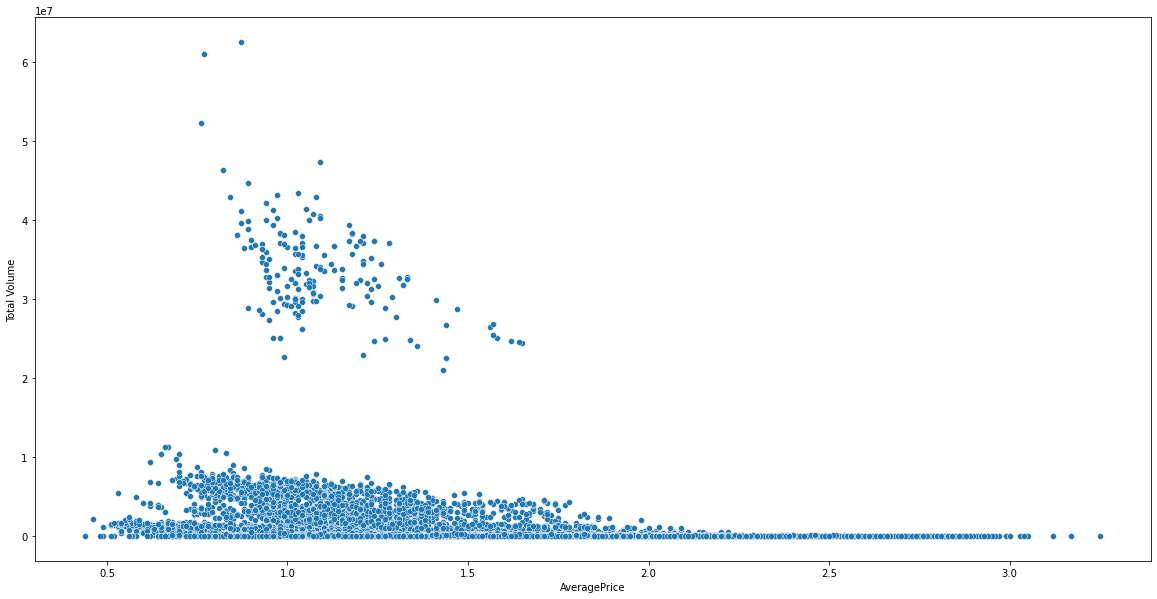

In [83]:
#Price distribution
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'AveragePrice', y = 'Total Volume', data = df)

2016-07-10    108
2016-07-24    108
2016-03-06    108
2015-01-25    108
2015-08-09    108
             ... 
2017-01-08    108
2015-09-13    108
2015-12-06    107
2017-06-18    107
2017-06-25    107
Name: Date, Length: 169, dtype: int64


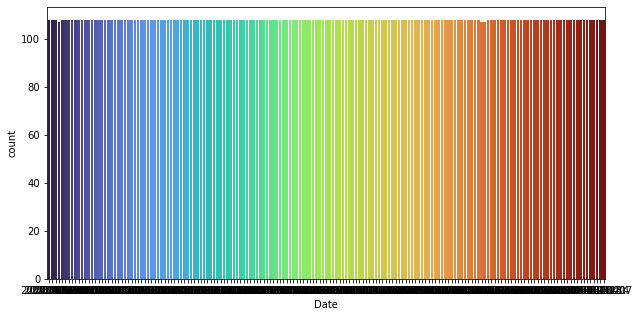

In [84]:
print(df['Date'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x='Date', data=df, palette="turbo")
plt.show()

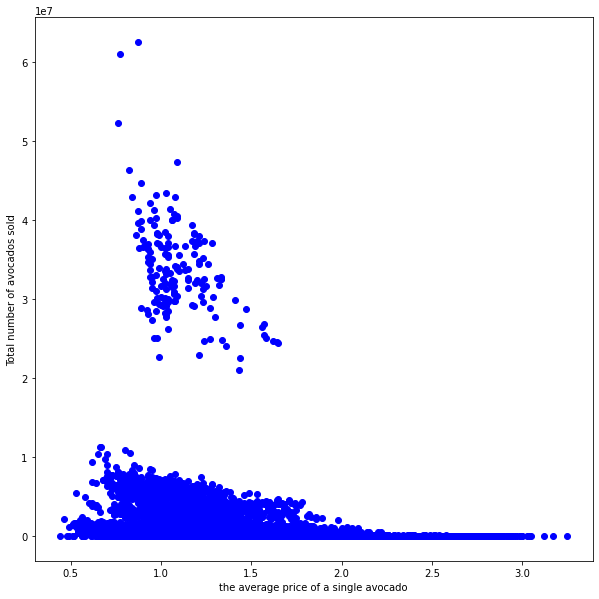

In [85]:
#Price vs the amount of sold Avacado
plt.figure(figsize=(10,10))
plt.scatter(df['AveragePrice'],df['Total Volume'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados sold')
plt.show()

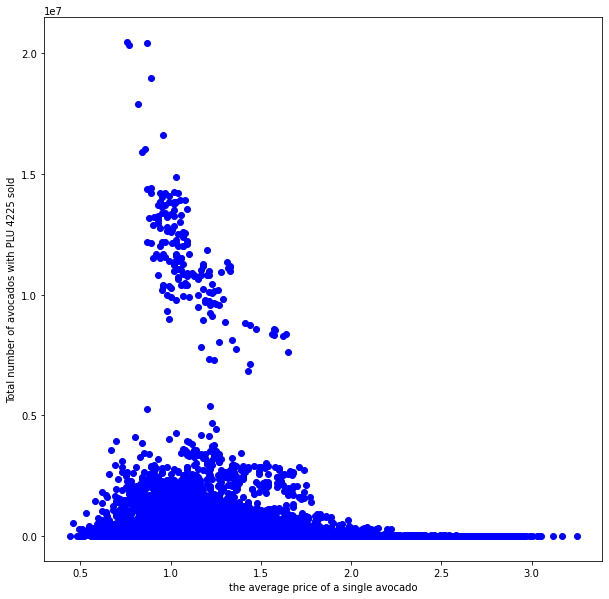

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(df['AveragePrice'],df['4225'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4225 sold')
plt.show()

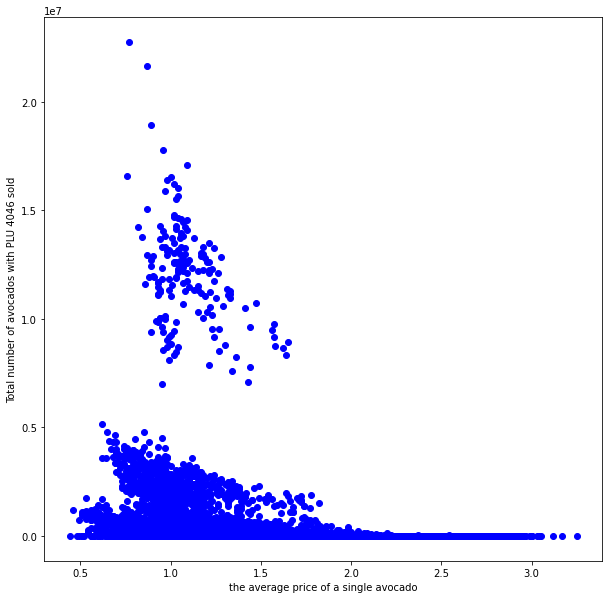

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(df['AveragePrice'],df['4046'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4046 sold')
plt.show()

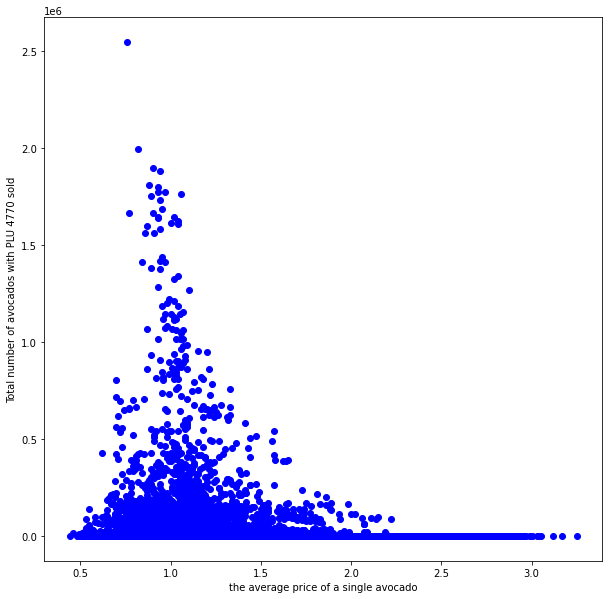

In [88]:
plt.figure(figsize=(10,10))
plt.scatter(df['AveragePrice'],df['4770'],c='blue')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4770 sold')
plt.show()


<Figure size 1440x720 with 0 Axes>

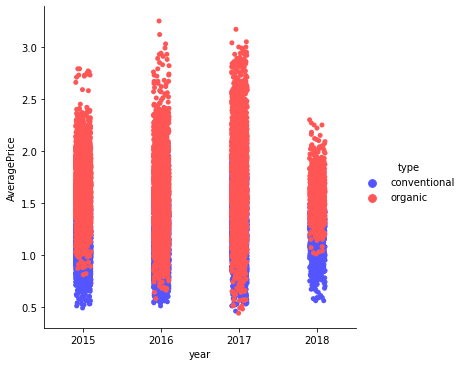

In [89]:
# Bivariate analysis like average price and year
plt.figure(figsize=(20,10))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

<Figure size 1440x720 with 0 Axes>

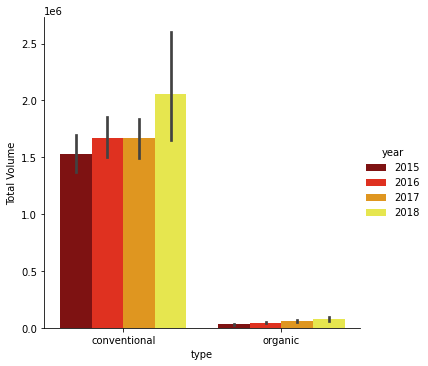

In [90]:
plt.figure(figsize=(20,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df, palette="hot")
plt.show()

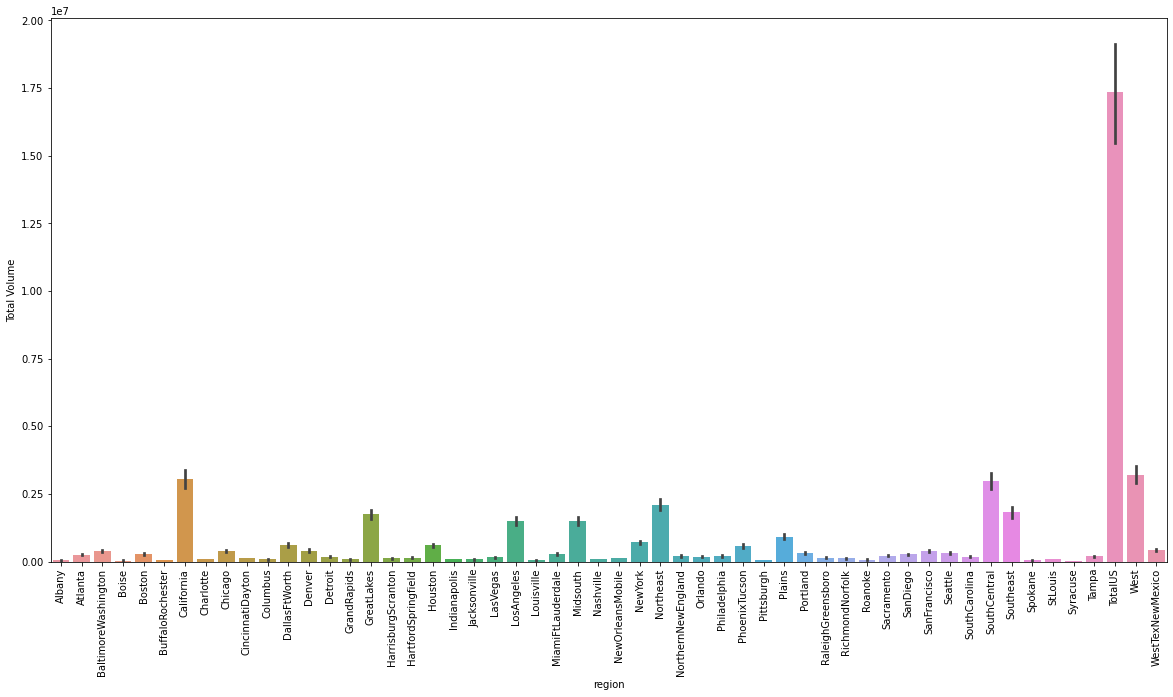

In [91]:
# Analyzing Total Volume w.r.t. Region.
plt.figure(figsize=(20,10))
sns.barplot(x='region', y='Total Volume', data=df)
plt.xticks(rotation=90)
plt.show()

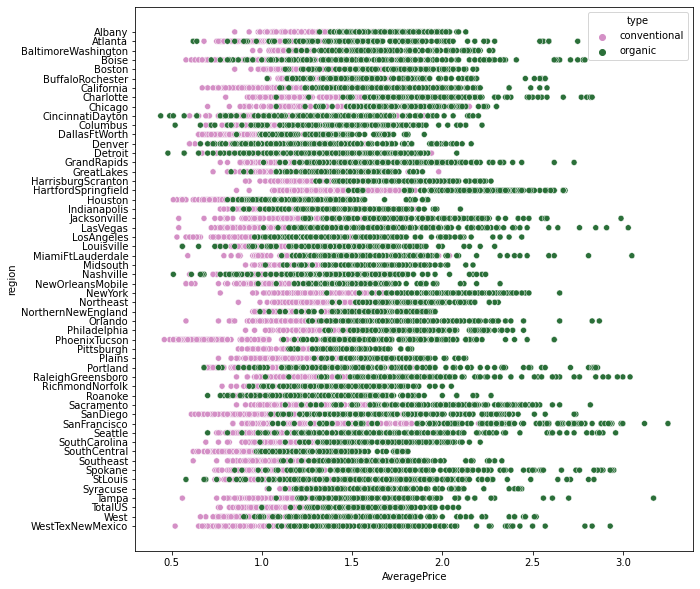

In [92]:
#Analyzing the average prise w.r.t. region
plt.figure(figsize=(10,10))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="cubehelix_r")
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

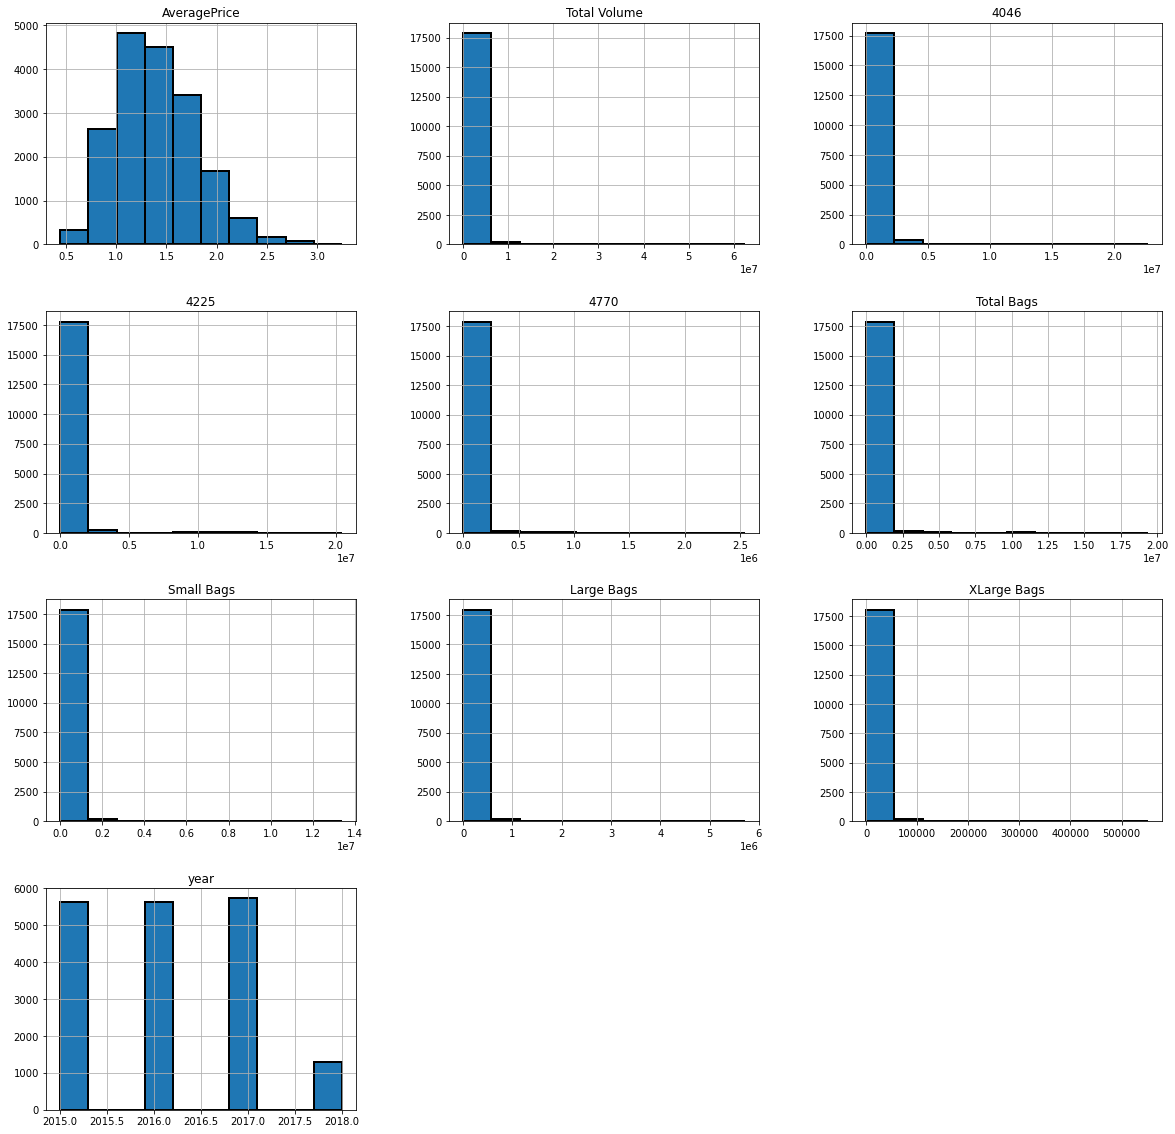

In [93]:
#Bargraph for all the Columns 
df.hist(edgecolor='black',linewidth=2.0,figsize=(20,20))

# Checking for the correlation

In [94]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


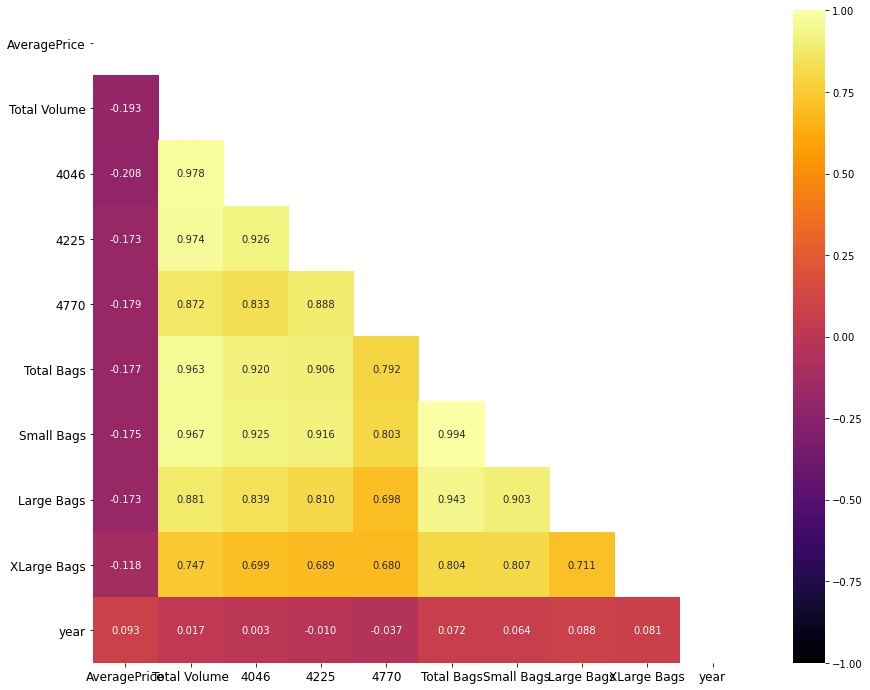

In [95]:
#Correlation Heatmap
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="inferno", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [97]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Converting the Catagorical columns in numerical

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [99]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['Date']=le.fit_transform(df['Date'])
df['type']=le.fit_transform(df['type'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int32  
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 1.6 MB


Here we found that all the catagorical column has been converted into the Numerical columns

# Skewness handling using power transform

In [101]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

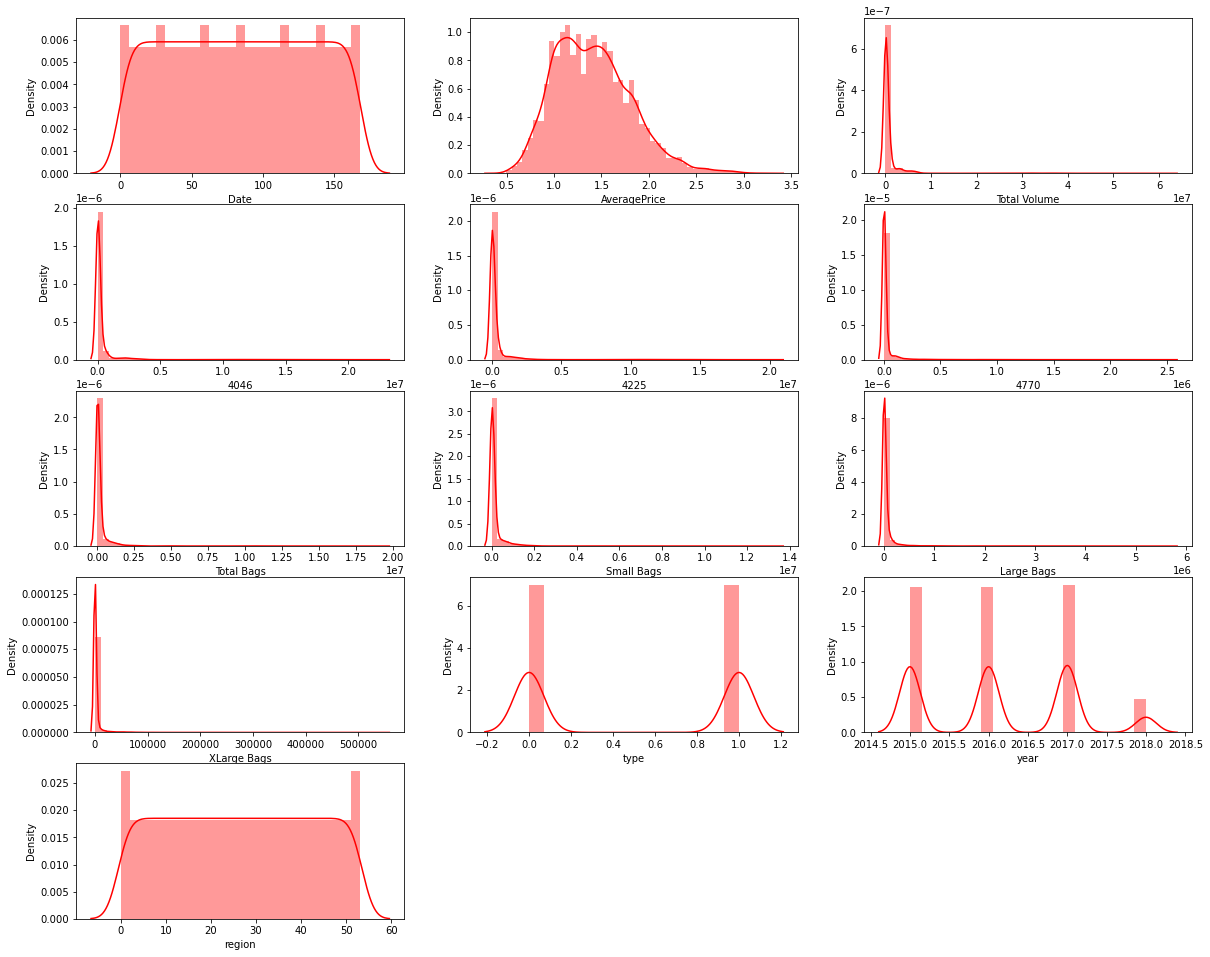

In [102]:
#Ploting and visualizing the skewness 
plt.figure(figsize=(20,20))
for i in enumerate(df.columns):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(df[i[1]],color='red')

In [103]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]=power_transform(df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']],method='yeo-johnson')

In [104]:
df.skew()

Date            0.000117
AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.215339
region          0.000030
dtype: float64

Here we got the Skewness in the range -0.5 to +0.5 so we have successfully removed the skewness

# Removing the Outliers using the Z-Score

In [105]:
#Dropping the NaN
df_new = df.dropna()
print(df_new)

       Date  AveragePrice  Total Volume      4046      4225      4770  \
0        51          1.33     -0.086605 -0.658619  0.307313 -0.247250   
1        50          1.35     -0.155746 -0.776870  0.231647 -0.201041   
2        49          0.93      0.179327 -0.731947  0.579503 -0.007072   
3        48          1.08      0.003876 -0.634200  0.415100 -0.148322   
4        47          1.28     -0.187640 -0.685293  0.224806 -0.137918   
...     ...           ...           ...       ...       ...       ...   
18244   161          1.63     -0.674587 -0.467366 -0.919470 -1.238310   
18245   160          1.71     -0.767550 -0.619883 -0.665372 -1.238310   
18246   159          1.87     -0.771505 -0.619831 -0.772496  0.401546   
18247   158          1.93     -0.698077 -0.550282 -0.710543  0.401246   
18248   157          1.62     -0.663809 -0.367908 -0.785173  0.122919   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0       -0.524004   -0.340627   -0.773351    -

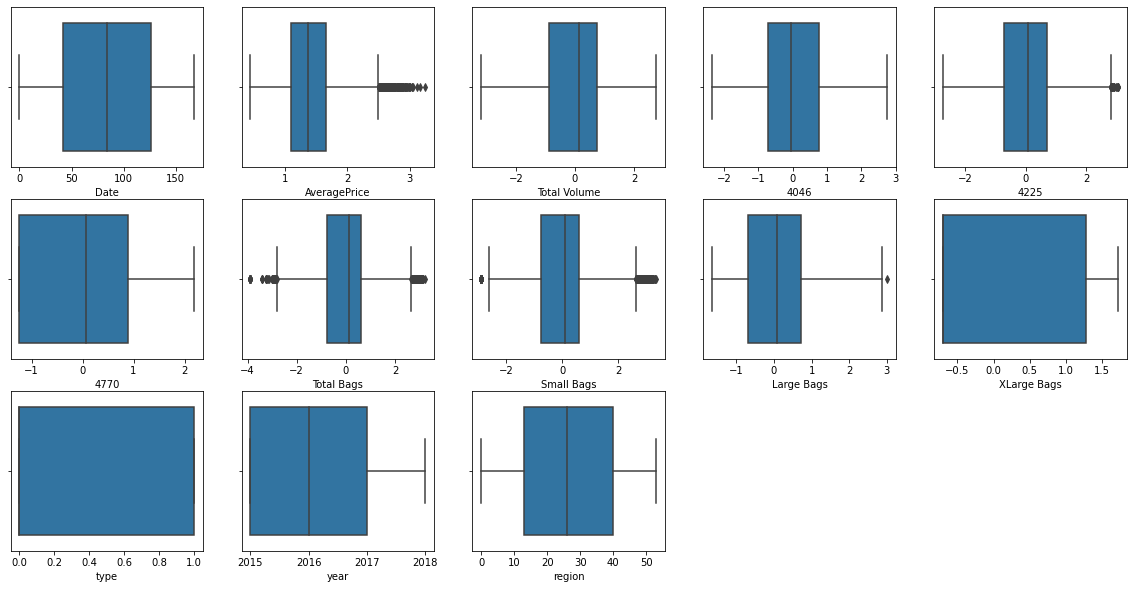

In [113]:
#Visualizing the Outliers
plt.figure(figsize=(20,10))
for o in enumerate(df):
    plt.subplot(3,5,o[0]+1)
    sns.boxplot(df[o[1]])

In [114]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11320,
       11321, 11321, 11322, 11323, 11324, 11325, 11325, 11326, 11326,
       11327, 11328, 11329, 11330, 11331, 11332, 11332, 11333, 11336,
       11338, 11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387,
       11388, 11594

In [115]:
df_new=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("without outliers::",df_new.shape)

with outliers:: (18249, 13)
without outliers:: (18025, 13)


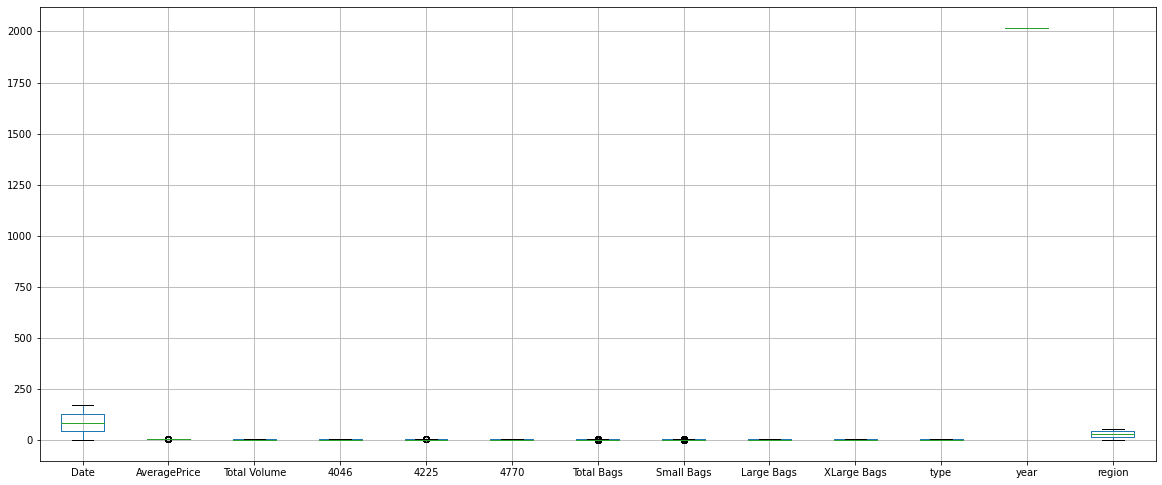

In [116]:
#Checking the outliers again
import matplotlib.pyplot as plt
import seaborn as sns
df_new.boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [117]:
#checking for loss percentage
loss_percent=(18249-18025)/18249*100
print(loss_percent)

1.2274645186037592


Lost about 1.22% data that means getting the 98.88% data which is acceptable

# X and Y Variables

In [118]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [119]:
#Scaling the X and Y variables
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [120]:
pd.DataFrame(x).describe().T

,count,mean,std,min,25%,50%,75%,max
0,18249.0,0.499983,0.290403,0.0,0.250000,0.500000,0.750000,1.0
1,18249.0,0.535934,0.168913,0.0,0.387365,0.559173,0.660161,1.0
2,18249.0,0.460478,0.196491,0.0,0.320550,0.451692,0.611041,1.0
3,18249.0,0.471515,0.173034,0.0,0.349082,0.483873,0.594105,1.0
4,18249.0,0.360837,0.291402,0.0,0.000000,0.383159,0.622378,1.0
5,18249.0,0.546233,0.140586,0.0,0.440598,0.566311,0.632233,1.0
6,18249.0,0.463549,0.160508,0.0,0.343822,0.480236,0.559757,1.0
7,18249.0,0.353751,0.214964,0.0,0.202661,0.369852,0.510544,1.0
8,18249.0,0.288959,0.412899,0.0,0.000000,0.000000,0.814763,1.0
9,18249.0,0.499918,0.500014,0.0,0.000000,0.000000,1.000000,1.0


In [121]:
#Finding the Best accuracy on the random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5864087132558445  on Random_state  189


# Train test Split

In [122]:
#splitting the data into 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [123]:
x_train.shape

(14599, 12)

In [124]:
y_train.shape

(14599,)

In [125]:
x_test.shape

(3650, 12)

In [126]:
y_test.shape

(3650,)

In [127]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=1)
lr.fit(x_train,y_train)

LinearRegression()

# Model Building

# Linear Regression Model

In [131]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.5685075939572602
MAE: 0.20557978750582392
MSE: 0.07026604628345187
RMSE: 0.26507743450443283


,Y Test,Pred
14192,2.11,1.715681
1873,0.98,1.258838
7293,1.17,1.050921
15087,1.78,1.602264
9888,1.61,1.852996


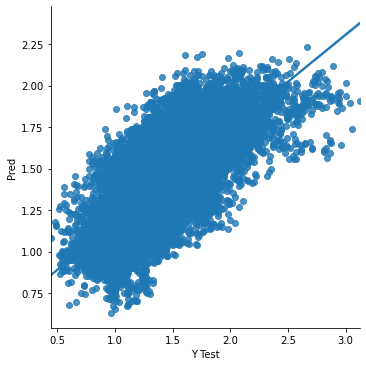

In [132]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Random Forest Regression Model

In [133]:
fst=RandomForestRegressor()
fst.fit(x_train,y_train)
pred=fst.predict(x_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.8610030026849207
MAE: 0.10691931115459882
MSE: 0.02263485824970646
RMSE: 0.1504488559268779


,Y Test,Pred
14192,2.11,1.8317
1873,0.98,0.9856
7293,1.17,1.3797
15087,1.78,1.5565
9888,1.61,1.9094


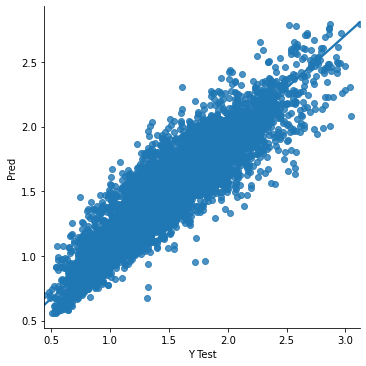

In [134]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Ridge model

In [135]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

0.5589344102523048
MSE: 0.07063257970484843
MAE: 0.20601844737009023
r2_score: 0.206205440473892


,Y Test,Pred
14192,2.11,1.8317
1873,0.98,0.9856
7293,1.17,1.3797
15087,1.78,1.5565
9888,1.61,1.9094


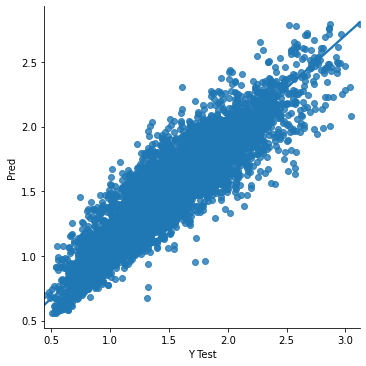

In [136]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Decisiopn Tree Regression

In [137]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
pred=tree.predict(x_test)
print('r2 score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score: 0.6981576961059341
MAE: 0.14887123287671233
MSE: 0.0491532759295499
RMSE: 0.2217053809215056


,Y Test,Pred
14192,2.11,1.69
1873,0.98,1.01
7293,1.17,0.95
15087,1.78,1.34
9888,1.61,1.93


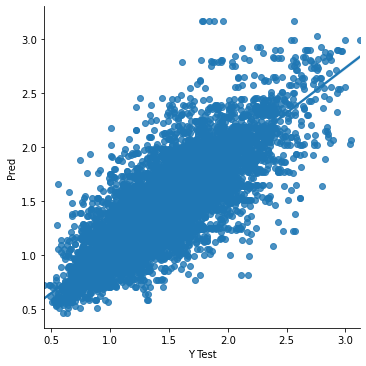

In [138]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Gradient Boosting 

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

0.79319027295458
MSE: 0.038562027921063086
MAE: 0.14778117173715216
r2_score: 0.6346836707564356


,Y Test,Pred
14192,2.11,1.69
1873,0.98,1.01
7293,1.17,0.95
15087,1.78,1.34
9888,1.61,1.93


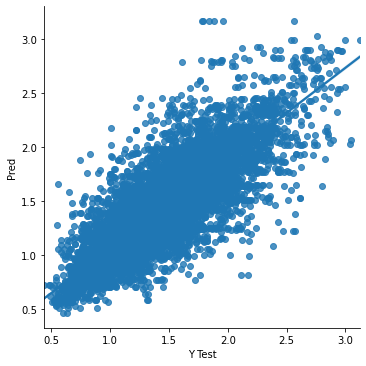

In [140]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
          RandomForestRegressor(),
          Ridge(),
          DecisionTreeRegressor(),  
          GradientBoostingRegressor(),]
            


names = ['LR','RF','R','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.8f}, {:8f}".format(name,score.mean(),score.std()))

LR    : 0.07585764, 0.028417
RF    : 0.04528615, 0.021868
R    : 0.07576031, 0.028457
DTR    : 0.08319644, 0.037475
GBR    : 0.05003954, 0.025820


Random Forest Regression is the best Model

# Hyperparameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
MSE: 0.022927361478669278
MAE: 0.10737115459882582
r2_score: 0.8155985128880883


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

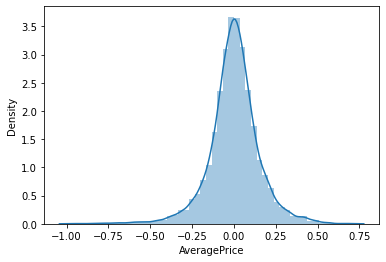

In [143]:
sns.distplot(RF_grid_PRED-y_test)

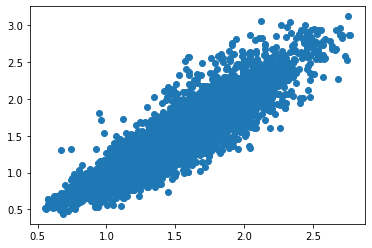

In [144]:
plt.scatter(RF_grid_PRED,y_test)

Saving the Model

In [145]:
import joblib

joblib.dump(RF_grid.best_estimator_,'Avacado_Project.obj')

['Avacado_Project.obj']